In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection-credit-card/creditcard.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/fraud-detection-credit-card/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

In [6]:
df['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64

In [7]:
## Checking for missing value
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [8]:
df['class'].value_counts()

0    284315
1       492
Name: class, dtype: int64

The Dataset is imbalanced.

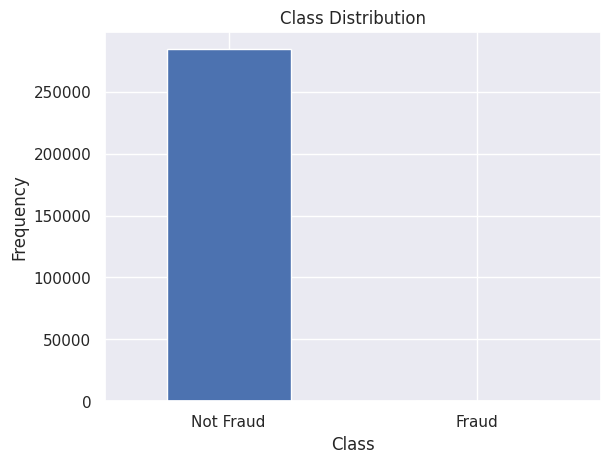

In [9]:
count_classes = df['class'].value_counts()
count_classes.plot(kind = 'bar', rot = 0)
plt.xticks(range(2),['Not Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

In [10]:
fraud = df[df['class'] == 1]
not_fraud = df[df['class'] == 0]

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
not_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

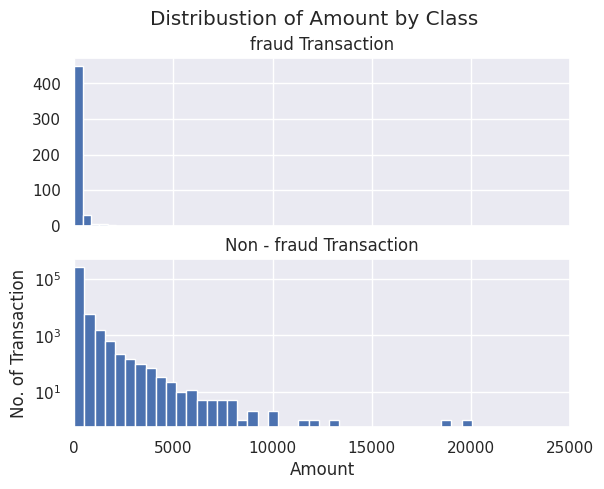

In [13]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Distribustion of Amount by Class")

ax1.hist(fraud.Amount, bins = 5)
ax1.set_title("fraud Transaction")

ax2.hist(not_fraud.Amount, bins = 50)
ax2.set_title("Non - fraud Transaction")

plt.xlabel("Amount")
plt.ylabel("No. of Transaction")

plt.xlim(0,25000)
plt.yscale('log')
plt.show()

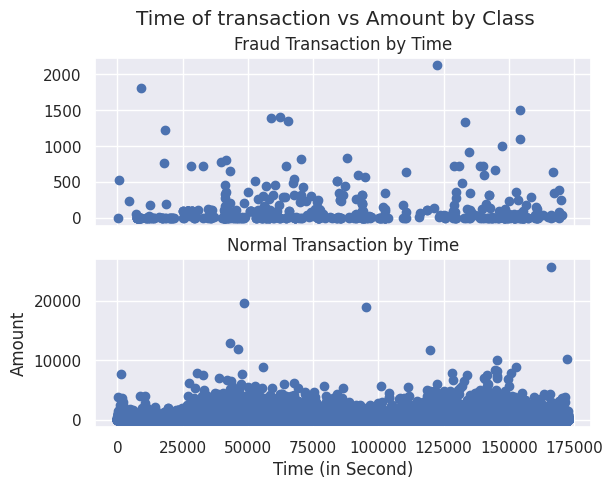

In [14]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Time of transaction vs Amount by Class")

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud Transaction by Time')

ax2.scatter(not_fraud.Time, not_fraud.Amount)
ax2.set_title('Normal Transaction by Time')

plt.xlabel("Time (in Second)")
plt.ylabel("Amount")

plt.show()

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## we are taking 20% data only for building a model

In [16]:
data = df.sample(frac=0.2, random_state=1000)
data.shape

(56961, 31)

In [17]:
fraud = data[data['class']==1]
valid = data[data['class']==0]

print(fraud.shape)
print(valid.shape)

(106, 31)
(56855, 31)


In [18]:
outlier_fraction = 106/(106+56858)
outlier_fraction

0.0018608243803103714

In [19]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
198800,132658.0,2.056433,-0.316915,-2.789687,-0.775164,2.497163,3.164444,-0.396550,0.715194,0.448127,...,0.243647,0.743975,0.037861,0.737525,0.302948,-0.087858,-0.001144,-0.064954,3.80,0
95536,65359.0,-0.476480,0.967301,1.660071,0.000008,-0.106866,-0.624360,0.599600,0.085344,-0.329163,...,-0.186026,-0.470205,0.055860,0.364065,-0.331242,0.082720,0.278155,0.119504,3.57,0
180242,124448.0,1.943666,-1.029557,-1.276665,-0.427737,-0.815657,-1.007531,-0.293930,-0.238641,-0.743251,...,-0.027971,0.203359,0.049295,0.092062,-0.178437,0.762153,-0.089487,-0.057625,107.77,0
278892,168508.0,-0.343991,1.475547,0.349266,1.211181,-0.510325,-1.281538,0.455647,0.011873,-0.737317,...,0.463618,1.563284,-0.107122,1.032006,-0.465200,0.211401,0.238458,0.208167,7.84,0
85098,60601.0,1.185368,0.248102,1.110961,2.448941,-0.387718,0.503952,-0.546283,0.203680,0.070122,...,-0.102446,-0.226039,-0.052715,-0.481575,0.368006,0.004532,0.033685,0.027790,4.72,0


In [20]:
columns = data.iloc[:,1:-1]
target = data.iloc[:,-1]

# split the data into training and test

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(columns, target, 
                                                    train_size=0.75,random_state=125,
                                                   stratify=target)

# Using Machine Learning model

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
print("Confusion Matrix - Training :", confusion_matrix(y_train, y_pred_train))
print("*****************************"*5)
print("Confusion Matrix - Test :", confusion_matrix(y_test, y_pred_test))

Confusion Matrix - Training : [[42634     7]
 [   29    50]]
*************************************************************************************************************************************************
Confusion Matrix - Test : [[14212     2]
 [    9    18]]


In [26]:
print(classification_report(y_train, y_pred_train))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42641
           1       0.88      0.63      0.74        79

    accuracy                           1.00     42720
   macro avg       0.94      0.82      0.87     42720
weighted avg       1.00      1.00      1.00     42720

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       0.90      0.67      0.77        27

    accuracy                           1.00     14241
   macro avg       0.95      0.83      0.88     14241
weighted avg       1.00      1.00      1.00     14241



In [27]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train))
print("*****************************"*5)
print("Accuracy - Test :", accuracy_score(y_test, y_pred_test))

Accuracy - Training : 0.9991573033707866
*************************************************************************************************************************************************
Accuracy - Test : 0.9992275823327014


In [28]:
# Ensemble Learning - Bagging
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50,random_state=1)
bgcl.fit(x_train, y_train)
y_pred_train_bg = bgcl.predict(x_train)
y_pred_test_bg = bgcl.predict(x_test)
print(classification_report(y_train, y_pred_train_bg))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_bg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42641
           1       1.00      1.00      1.00        79

    accuracy                           1.00     42720
   macro avg       1.00      1.00      1.00     42720
weighted avg       1.00      1.00      1.00     42720

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       0.77      0.89      0.83        27

    accuracy                           1.00     14241
   macro avg       0.89      0.94      0.91     14241
weighted avg       1.00      1.00      1.00     14241



In [29]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_bg))
print("*****************************"*5)
print("Accuracy - Test :", accuracy_score(y_test, y_pred_test_bg))

Accuracy - Training : 1.0
*************************************************************************************************************************************************
Accuracy - Test : 0.9992978021206376


In [30]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)
print(classification_report(y_train, y_pred_train_dt))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42641
           1       1.00      1.00      1.00        79

    accuracy                           1.00     42720
   macro avg       1.00      1.00      1.00     42720
weighted avg       1.00      1.00      1.00     42720

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       0.72      0.85      0.78        27

    accuracy                           1.00     14241
   macro avg       0.86      0.93      0.89     14241
weighted avg       1.00      1.00      1.00     14241



In [31]:
# Ensemble Learning - AdaBoosting method
from sklearn.ensemble import AdaBoostClassifier
adbcl = AdaBoostClassifier(random_state=1)
adbcl.fit(x_train, y_train)
y_pred_train_adb = adbcl.predict(x_train)
y_pred_test_adb = adbcl.predict(x_test)
print(classification_report(y_train, y_pred_train_adb))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_adb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42641
           1       0.93      0.81      0.86        79

    accuracy                           1.00     42720
   macro avg       0.96      0.91      0.93     42720
weighted avg       1.00      1.00      1.00     42720

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       0.88      0.81      0.85        27

    accuracy                           1.00     14241
   macro avg       0.94      0.91      0.92     14241
weighted avg       1.00      1.00      1.00     14241



In [32]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50, random_state=1)
gbcl.fit(x_train, y_train)
y_pred_train_gd = gbcl.predict(x_train)
y_pred_test_gd = gbcl.predict(x_test)
print(classification_report(y_train, y_pred_train_gd))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_gd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42641
           1       0.97      0.87      0.92        79

    accuracy                           1.00     42720
   macro avg       0.99      0.94      0.96     42720
weighted avg       1.00      1.00      1.00     42720

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       0.83      0.70      0.76        27

    accuracy                           1.00     14241
   macro avg       0.91      0.85      0.88     14241
weighted avg       1.00      1.00      1.00     14241



In [33]:
# XGBoost
from xgboost import XGBClassifier
xgbcl = XGBClassifier()
xgbcl.fit(x_train, y_train)
y_pred_train_xgb = xgbcl.predict(x_train)
y_pred_test_xgb = xgbcl.predict(x_test)
print(classification_report(y_train, y_pred_train_xgb))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42641
           1       1.00      1.00      1.00        79

    accuracy                           1.00     42720
   macro avg       1.00      1.00      1.00     42720
weighted avg       1.00      1.00      1.00     42720

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       0.96      0.85      0.90        27

    accuracy                           1.00     14241
   macro avg       0.98      0.93      0.95     14241
weighted avg       1.00      1.00      1.00     14241



In [34]:
# IsolationForest, LocalOutlierFactor, OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
Classification = {"Isolation Forest" : IsolationForest(max_samples=len(columns),
                                                     contamination=outlier_fraction),
                 
                 "Local Outlier Factor" : LocalOutlierFactor(contamination=outlier_fraction),
                 
                 "One Class SVM" : OneClassSVM()}

In [35]:
n_outlier = len(fraud)

for i, (clf_name, clf) in enumerate(Classification.items()):
    if clf_name =='Local Outlier Factor' :
        y_pred = clf.fit_predict(columns)
        score_prediction = clf.negative_outlier_factor_
        
    elif clf_name =='One Class SVM' :
        clf.fit(columns)
        y_pred = clf.predict(columns)
        
    else:
        clf.fit(columns)
        score_prediction = clf.decision_function(columns)
        y_pred = clf.predict(columns)
        
    y_pred[y_pred==1] = 0
    y_pred[y_pred==-1] = 1
    n_error = (y_pred !=target).sum()
    
    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :")
    
    print(accuracy_score(target, y_pred))
    print("Classification Report :")
    print(classification_report(target, y_pred))

Isolation Forest : 148
Accuracy Score :
0.9974017310089359
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.30      0.30      0.30       106

    accuracy                           1.00     56961
   macro avg       0.65      0.65      0.65     56961
weighted avg       1.00      1.00      1.00     56961

Local Outlier Factor : 170
Accuracy Score :
0.9970155018345885
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.20      0.20      0.20       106

    accuracy                           1.00     56961
   macro avg       0.60      0.60      0.60     56961
weighted avg       1.00      1.00      1.00     56961

One Class SVM : 28403
Accuracy Score :
0.5013605800459964
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.50      